In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [3]:
df=pd.read_csv('vehicle.csv')

In [4]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
df.shape

(846, 19)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [8]:
#looking for the missing values 
df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [9]:
#treating the missing values with the mean values
df.fillna(df.mean(), inplace=True)

In [10]:
#rechecking if all the values have been replaced
df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

All the missing values have been replcaed by the mean values 

circularity                          AxesSubplot(0.1,0.77069;0.173913x0.12931)
compactness                     AxesSubplot(0.308696,0.77069;0.173913x0.12931)
distance_circularity            AxesSubplot(0.517391,0.77069;0.173913x0.12931)
elongatedness                   AxesSubplot(0.726087,0.77069;0.173913x0.12931)
hollows_ratio                       AxesSubplot(0.1,0.615517;0.173913x0.12931)
max.length_aspect_ratio        AxesSubplot(0.308696,0.615517;0.173913x0.12931)
max.length_rectangularity      AxesSubplot(0.517391,0.615517;0.173913x0.12931)
pr.axis_aspect_ratio           AxesSubplot(0.726087,0.615517;0.173913x0.12931)
pr.axis_rectangularity              AxesSubplot(0.1,0.460345;0.173913x0.12931)
radius_ratio                   AxesSubplot(0.308696,0.460345;0.173913x0.12931)
scaled_radius_of_gyration      AxesSubplot(0.517391,0.460345;0.173913x0.12931)
scaled_radius_of_gyration.1    AxesSubplot(0.726087,0.460345;0.173913x0.12931)
scaled_variance                     AxesSubplot(0.1,

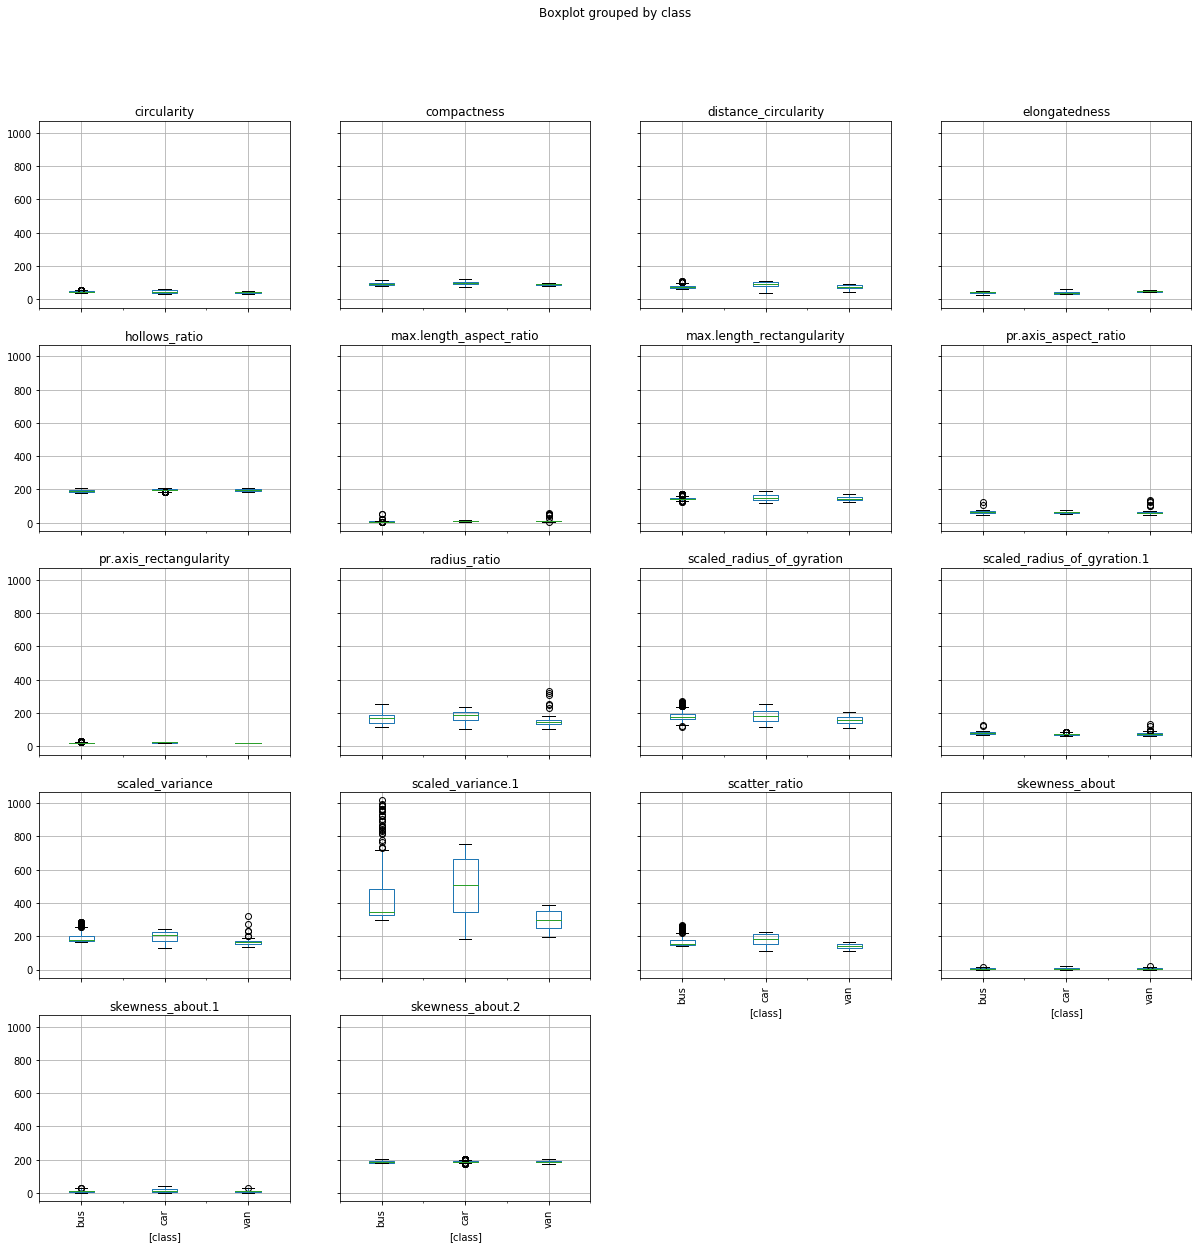

In [11]:
df.boxplot(return_type='axes', figsize=(20,20), rot = 90, by = 'class')

we can notice that very few outliers are present and they can be removed

In [12]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)
iqr = q3 - q1
mincap = q1-(1.5*iqr)
maxcap = q3+(1.5*iqr)
df1 = df[~((df.select_dtypes(exclude='object') < mincap) | (df.select_dtypes(exclude='object') >maxcap)).any(axis=1)]
print("No of observations in original dataset :" , df.shape[0])
print("No of observations after removing outliners :" , df1.shape[0])

No of observations in original dataset : 846
No of observations after removing outliners : 813


In [13]:
# Encoding class variable: 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df1['class'])

LabelEncoder()

In [14]:
df1['class'] = le.transform(df1['class'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
df1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.000000,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.000000,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.000000,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.000000,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
5,107,44.828775,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,0


2. Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

In [16]:
df1.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
compactness,1.000000,0.679901,0.786810,0.746091,0.200887,0.497660,0.810430,-0.788449,0.811810,0.674166,0.792230,0.814537,0.577596,-0.254274,0.200199,0.161505,0.295404,0.364160,-0.028066
circularity,0.679901,1.000000,0.787513,0.641013,0.205616,0.563732,0.844049,-0.816212,0.841827,0.961873,0.803324,0.835218,0.926273,0.067633,0.140639,-0.014774,-0.118122,0.038081,-0.151426
distance_circularity,0.786810,0.787513,1.000000,0.808392,0.245423,0.668662,0.904856,-0.908822,0.894892,0.768843,0.884633,0.889593,0.702683,-0.237766,0.098711,0.263514,0.128336,0.320969,-0.058983
radius_ratio,0.746091,0.641013,0.808392,1.000000,0.666403,0.460737,0.789305,-0.844374,0.763736,0.577067,0.793528,0.778087,0.550726,-0.403672,0.040348,0.187295,0.418257,0.504630,-0.225840
pr.axis_aspect_ratio,0.200887,0.205616,0.245423,0.666403,1.000000,0.138243,0.199988,-0.302280,0.169522,0.146175,0.215642,0.187041,0.153722,-0.325331,-0.051643,-0.028793,0.406247,0.419789,-0.216783
max.length_aspect_ratio,0.497660,0.563732,0.668662,0.460737,0.138243,1.000000,0.497043,-0.502220,0.497641,0.647844,0.411749,0.459248,0.404216,-0.333074,0.083734,0.141178,0.056225,0.394449,0.371072
scatter_ratio,0.810430,0.844049,0.904856,0.789305,0.199988,0.497043,1.000000,-0.971404,0.989034,0.806303,0.977143,0.993807,0.794274,0.001917,0.063319,0.214919,-0.003595,0.115782,-0.283371
elongatedness,-0.788449,-0.816212,-0.908822,-0.844374,-0.302280,-0.502220,-0.971404,1.000000,-0.950026,-0.769684,-0.965252,-0.957135,-0.762109,0.087179,-0.044795,-0.184625,-0.104837,-0.210884,0.337823
pr.axis_rectangularity,0.811810,0.841827,0.894892,0.763736,0.169522,0.497641,0.989034,-0.950026,1.000000,0.810894,0.964170,0.989139,0.792606,0.017604,0.071871,0.216661,-0.026842,0.097842,-0.251222
max.length_rectangularity,0.674166,0.961873,0.768843,0.577067,0.146175,0.647844,0.806303,-0.769684,0.810894,1.000000,0.749909,0.795560,0.866913,0.052080,0.134511,-0.002135,-0.117988,0.067177,-0.025047


From the graph we can observe that there is a high correlation between the features but those can be eliminated using the PCA technique 

3. Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance) - 10 points

In [17]:
y = df1['class']
X = df1.drop('class', axis = 1)

In [18]:
# normalizing Data 
from scipy.stats import zscore
X = X.apply(zscore)

In [19]:
X.shape

(813, 18)

In [20]:
from sklearn.decomposition import PCA

In [21]:
cov_matrix = np.cov(X.T)

In [22]:
eival, eivec = np.linalg.eig(cov_matrix)

In [23]:
# Building an Array of Eigen Vectors and Values

eig_pair = [(eival[index], eivec[:, index]) for index in range (len(eival))]

In [24]:
eig_pair.sort()
eig_pair.reverse()

In [25]:
eivalsorted = [eig_pair[index][0] for index in range(len(eival))]

In [26]:
eivecsorted = [eig_pair[index][1] for index in range(len(eival))]

In [27]:
tot = sum(eival)
tot

18.022167487684715

In [28]:
var_explained = [(i/tot)*100 for i in sorted(eival, reverse = True)]
cum_var = np.cumsum(var_explained)
cum_var

array([ 54.36109244,  73.10682316,  79.81561088,  86.12288219,
        91.09408821,  94.74422659,  96.53426834,  97.79137464,
        98.41325604,  98.83526262,  99.17921189,  99.4195499 ,
        99.58305228,  99.72948548,  99.83643991,  99.93048996,
        99.98224832, 100.        ])

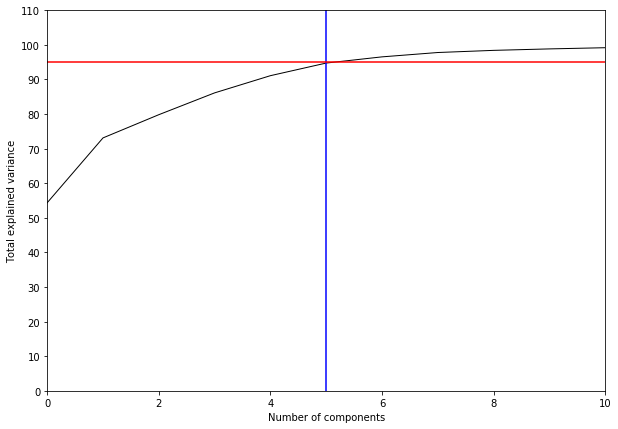

In [29]:
plt.figure(figsize=(10,7))

plt.plot(cum_var, color='k', lw=1)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 10,1)
plt.yticks(np.arange(0, 120, 10))

plt.axvline(5, c='b')
plt.axhline(95, c='r')

plt.show()

In [30]:
pca = PCA(n_components=5)
pca.fit(df1)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)

In [31]:
X_pca = pca.transform(df1)

In [32]:
X_pca.shape

(813, 5)

In [33]:
pca.explained_variance_

array([33934.28341127,   568.85849316,   365.78764372,    85.89851432,
          69.01968542])

In [34]:
pca.explained_variance_ratio_

array([0.96461599, 0.01617037, 0.01039788, 0.00244175, 0.00196195])

In [35]:
PCA_Comp = pd.DataFrame(X_pca)

4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyperparameters and do cross-validation to find the accuracy. (10 points)

In [36]:
X = PCA_Comp

In [37]:
y.shape

(813,)

In [38]:
X.shape

(813, 5)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

In [40]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [41]:
classifier = SVC()

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
params = {'C':[0.01, 0.05, 0.5, 1], 'kernel':['linear', 'rbf']}

In [44]:
model1 = GridSearchCV(classifier, param_grid=params, n_jobs=-1)

In [45]:
model1.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [46]:
prediction=model1.predict(X_test)

In [47]:
print("Best Hyper Parameters:",model1.best_params_)

Best Hyper Parameters: {'C': 1, 'kernel': 'rbf'}


In [48]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [49]:
print("Accuracy:",metrics.accuracy_score(prediction,y_test))

Accuracy: 0.901840490797546


In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
scores = cross_val_score(model1, X, y, cv=5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default v

In [52]:
scores

array([0.76219512, 0.75460123, 0.81595092, 0.79012346, 0.80745342])

In [59]:
print(" The Accuracy score : %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

 The Accuracy score : 0.79 (+/- 0.05)
